<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Rotten Tomato Movie Review</a></center>
<br/>
<center><a style="font-size: 22pt; font-weight: bold">Binary Classification on Artificial Movie Data Set</a></center>
<br/>

---

# Group members



* HACHEM Racha
* FESTA Denis
* BHATT Ragi


# Introduction

## Problem Statement

Given a dataset of movie reviews from Rotten Tomatoes, the objective is to perform sentiment analysis and classify each review into one of the following categories: rotten or fresh. The sentiment classification is based on the text of the review that is classified into one of the following categories: positive, negative, or neutral as well as the type of critic (Top Critics or All Critics).

The goal of this sentiment analysis is to provide insights into the overall sentiment of the movie reviews, identify the most positive and negative movies, and potentially improve the quality of movies by analyzing the feedback provided by the reviewers.

## Approach

To achieve this objective, we need to preprocess the text data, extract features, train a sentiment classification model using machine learning techniques, and evaluate the performance of the model. Additionally, we may need to explore the dataset to identify potential issues such as class imbalance or missing data and address them accordingly. Finally, we can visualize the results of the sentiment analysis to gain insights into the sentiment of the movie reviews and potentially make recommendations to improve the quality of the movies.

## Data

The website "Rotten Tomatoes" allows to compare the ratings given by regular users (audience score) and the ratings given/reviews provided by critics (tomatometer) who are certified members of various writing guilds or film critic-associations.

We have two datasets, namely critics dataset and movies dataset.

In the movies dataset each record represents a movie available on Rotten Tomatoes, with the URL used for the scraping, movie tile, description, genres, duration, director, actors, users' ratings, and critics' ratings.

In the critics dataset each record represents a critic review published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

Link to Dataset: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4db0094924e0fda5b5e3f2648cade6dad124626d65def6a593fe1fed3895dc9b
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
from datetime import datetime
from pathlib import Path

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader, random_split


import langdetect
import random
import nltk
import gensim
import torch
import torch.nn as nn

import imblearn
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import gc
import tqdm
import re
from collections import defaultdict
import string
from textblob import TextBlob


In [ ]:
%reload_ext autoreload
%autoreload 2

# Set precision for pd and np (np: suppress also sci notation)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = "{:,.4g}".format

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.1.3

1.2.1


# Data Loading

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1LR3NJYGoA_yRbN8iX_DgZrUibwNAJFma&confirm=T" -O "rotten_tomatoes_critic_reviews.csv"
!wget "https://docs.google.com/uc?export=download&id=1QL3O-ZATclLKi2y44kRkaRwVB1oA_CPe&confirm=T" -O "rotten_tomatoes_movies.csv"

--2023-03-06 23:26:20--  https://docs.google.com/uc?export=download&id=1LR3NJYGoA_yRbN8iX_DgZrUibwNAJFma&confirm=T
Resolving docs.google.com (docs.google.com)... 173.194.194.139, 173.194.194.102, 173.194.194.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/omovh4v8nskvno2a69d434cdf8s7m0n9/1678145175000/17437101782846932946/*/1LR3NJYGoA_yRbN8iX_DgZrUibwNAJFma?e=download&uuid=5a2719fa-4027-41e2-a779-c797cd627e82 [following]
--2023-03-06 23:26:20--  https://doc-14-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/omovh4v8nskvno2a69d434cdf8s7m0n9/1678145175000/17437101782846932946/*/1LR3NJYGoA_yRbN8iX_DgZrUibwNAJFma?e=download&uuid=5a2719fa-4027-41e2-a779-c797cd627e82
Resolving doc-14-as-docs.googleusercontent.com (doc-14-as-docs.googleusercontent.com)... 142.250.136.

In [ ]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
critic_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

In [ ]:
critic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [ ]:
movie_df = pd.read_csv('rotten_tomatoes_movies.csv')

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [ ]:
movie_df.head()

rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   
3  Sidney Lumet's feature debut is a superbly wri...             NR   
4  One of Disney's finest live-action adventures,...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

   ...      production_company  tomatometer_status tomatometer_rating  \
0  ...        20th Century Fox              Rotten                 49   
1  ...  Sony Pictures Classics     Certified-Fresh                 87   
2  ...             Waner Bros.               Fresh                 67   
3  ...    Criterion Collection     Certified-Fresh                100   
4  ...                  Disney               Fresh                 89   

  tomatometer_count  audience_status  audience_rating audience_count  \
0               149          Spilled               53      2.544e+05   
1               142          Upright               64      1.157e+04   
2                24          Spilled               53      1.468e+04   
3                54          Upright               97      1.054e+05   
4                27          Upright               74      6.892e+04   

   tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0                             43                               73   
1                             44                              123   
2                              2                               16   
3                              6                               54   
4                              5                               24   

   tomatometer_rotten_critics_count  
0                                76  
1                                19  
2                                 8  


In [ ]:
critic_df.head()

rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thief i...

In [ ]:
critic_df.describe()

rotten_tomatoes_link   critic_name top_critic  \
count                             1130017       1111488    1130017   
unique                              17712         11108          2   
top     m/star_wars_the_rise_of_skywalker  Emanuel Levy      False   
freq                                  992          8173     841481   

        publisher_name review_type review_score review_date  \
count          1130017     1130017       824081     1130017   
unique            2230           2          814        8015   
top     New York Times       Fresh          3/5  2000-01-01   
freq             13293      720210        90273       48019   

                 review_content  
count                   1064211  
unique                   949181  
top     Parental Content Review  
freq                        267

In [ ]:
critic_df.dtypes.value_counts()

object    7
bool      1
dtype: int64

# Exploratory Analysis

In [ ]:
# How many reviews are there?
print("Number of reviews:", len(critic_df))

Number of reviews: 1130017


In [ ]:
# In the critic reviews, we are interested in the review type (fresh or rotten), the review score and the review content.
reviews_df = critic_df[["review_type", "review_score", "review_content"]]
display(reviews_df.head())

review_type review_score                                     review_content
0       Fresh          NaN  A fantasy adventure that fuses Greek mythology...
1       Fresh          NaN  Uma Thurman as Medusa, the gorgon with a coiff...
2       Fresh          NaN  With a top-notch cast and dazzling special eff...
3       Fresh        3.5/5  Whether audiences will get behind The Lightnin...
4      Rotten          NaN  What's really lacking in The Lightning Thief i...

Target Distribution

Review type counts:


Fresh     720210
Rotten    409807
Name: review_type, dtype: int64

Review type percents:


Fresh    0.6373
Rotten   0.3627
Name: review_type, dtype: float64

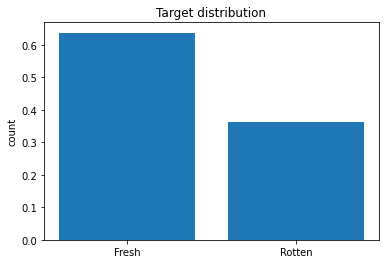

In [ ]:
# Let's focus on the review type first.
# We want to know how many reviews are fresh and how many are rotten.
# We can use the value_counts() method to get the counts for each value in the review_type column.

review_type_counts = reviews_df["review_type"].value_counts()
print("Review type counts:")
display(review_type_counts)

# We can also use the value_counts() method to get the percentage of each value in the review_type column.
review_type_percents = reviews_df["review_type"].value_counts(normalize=True)
print("Review type percents:")
display(review_type_percents)

plt.bar(x=['Fresh', 'Rotten'], height=reviews_df["review_type"].value_counts(normalize=True).to_numpy())
plt.ylabel('count')
plt.title('Target distribution')
plt.show()

In [ ]:
# What would happen if we took into account only the reviwes with a non-null review score?
reviews_df = reviews_df[reviews_df["review_score"].notnull()]
print("Number of reviews with a non-null review score :", len(reviews_df))


Number of reviews with a non-null review score : 824081


3/5      90273
4/5      83659
3/4      72366
2/5      60174
2/4      47546
2.5/4    44994
3.5/4    34371
3.5/5    30885
B        24358
5/5      24139
2.5/5    21260
1/5      20709
1.5/4    20475
B+       19822
4/4      18239
Name: review_score, dtype: int64

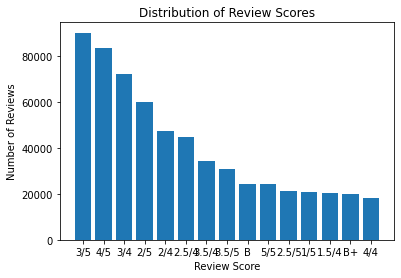

In [ ]:
# It's a good number so we can continue with this subset of the data.
# Now, it's better to work on a more balanced dataset.
# Of all the reviews, what is the distribution of the review scores?
reviews_score_counts = reviews_df["review_score"].value_counts().iloc[:15]

display(reviews_score_counts)

plt.bar(reviews_score_counts.index, reviews_score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores")
plt.show()

Number of reviews over 5: 357067
Number of reviews over 4: 258454


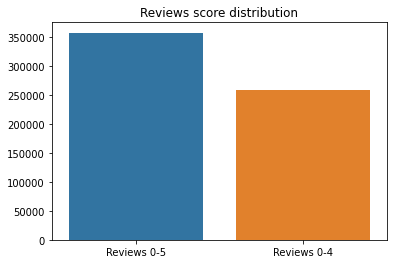

In [ ]:
# We see there's some imbalance in the way the scores are evaluated:
# some scores are with 5 as the best, some others with 4 as the best.
# What if we go back and check which one of the two types of scoring is the most common?
reviews_over_five_df = reviews_df[reviews_df["review_score"].str.endswith("/5")]
reviews_over_four_df = reviews_df[reviews_df["review_score"].str.endswith("/4")]

n_reviews_over_five = len(reviews_over_five_df)
n_reviews_over_four = len(reviews_over_four_df)
print("Number of reviews over 5:", n_reviews_over_five)
print("Number of reviews over 4:", n_reviews_over_four)

# Barchart of the reviews score distribution.
# We can see that the reviews are mostly over 5
x = ['Reviews 0-5', 'Reviews 0-4']

# Create the bar chart
sns.barplot(x=x, y=[n_reviews_over_five, n_reviews_over_four])

# Add titles and labels
plt.title('Reviews score distribution')
# plt.xlabel('Values')
# plt.ylabel('Scalar')

# Show the chart
plt.show()

# Preprocessing the Data

In summary: there are a lot of reviews in the dataset
but different strategy choices can leave the dataset almost intact or greatly
dicrease its size.
The most relevant quantities described in the dataset are:
- the content of a review
- the type of a review [rotten/fresh]
- the score of a review.

Given the task of analyzing the sentiment of a review, there are
two paths to be considered:
- ignore the score of a review and only consider the type,
- consider the score of a review when trying to predict the type.

The following section of the notebook will assume the choice of the second strategy. Soon it will become evident that the scores assigned to the review
are not a trivial case to handle. To begin with, not all the reviews have
a score, and secondly, not all the reviews are rated with the same degrees:
some of them are rated with a score from 0 to 5, others with a score
from 0 to 4, others with a score from 0 to 100. To keep things simple,
the choice made is to only consider the reviews with a score from 0 to 5 because they are greatest in quantity.

It will also show up that some reviews considered "Fresh" have a rating of 1 or 0 and some considered "Rotten" have a rating of 4 or 5. Although there might be
good reasons from the authors of the review to create such an apparent
contradiction, the strategy chosen was to train the models over a dataset
where the type of a review and its content go in parallel, as such, it was chosen to keep only the "Rotten" reviews with a score $s:\,0\leq s\leq 2.5$
and the "Fresh" reviews with a score $s:\,3\leq s\leq 5$, 
in particular, since the scores are discretized as multiples of $0.5$:
- the possible scores for a "Rotten" review are $\{0, 0.5, 1, 1.5, 2, 2.5\}$
- the possible scores for a "Fresh" review are $\{3, 3.5, 4, 4.5, 5\}$.

Notice that the cardinality of the set of possible scores for the "Rotten"
reviews is greater than the score of the "Fresh" reviews, this will lead to
two different sub-paths:
- when dealing with the prediction of the type of a review [rotten/fresh], there will be the need of
for the "Rotten" reviews to be equal in number to the "Fresh" reviews,
- when dealing with the prediction of the score of a review (regression), then
the number of reviews will need to be the same for every score.

Given the previous subdivision of the 11 possible scores among the 2 possible types, it was decided to sample $n$ reviews for every possible score and then add $n$ more reviews with one of the possible scores for a "Fresh" rotten,
in particular the choice made was to add $n$ scores to the set of reviews with a score of 3 (other approaches would have been possible, such as taking $n$ additional scores randomly to make the number of "Fresh" and "Rotten" reviews balanced again).
Given this choice of redistribution of the reviews, before tackling the regression task, to make the dataset balanced with respect to the scores (whereas previously it was made balanced with respect to the types) it was sufficient to drop $n$ reviews from the set set of reviews with a score of 3. 

After balancing the dataset, the content of the reviews was preprocessed
according to the following pipeline:
- numerical data or irrelevant characters removal
- tokenization
- stopwords removal
- lemmatization.

Next, the text obtained joining all the preprocessed reviews was embedded
and plotted (the plot is around 20 MB, this is the reason why it's not show,
but it will be made available.)

The last step is the analysis of the the distribution of the lengths of the reviews,
first with respect to the length measured in number of characters and then in number of tokens, the second one in particular is relevant to decide what size
of the input to pick when training a neural network model on top of a pre-trained BERT model.
In this case, the lenght of the reviews (already preprocessed) will always be
$\leq 30$, this fact will help improving the performance of the neural-network training.

In [ ]:
# Focusing only on the reviews scored 0-5
reviews_df = reviews_over_five_df

2/5       59541
1/5       20675
2.5/5     18482
1.5/5      8211
3/5        7411
0/5        2448
0.5/5      1456
3.5/5        98
2.25/5       80
2.75/5       54
2.3/5        48
2.4/5        45
2.8/5        40
1.75/5       36
2.2/5        30
1.25/5       26
4/5          26
2.9/5        21
1.8/5        18
1.9/5        14
5/5          13
1.7/5        11
1.3/5        10
1.4/5         9
1.2/5         7
Name: review_score, dtype: int64

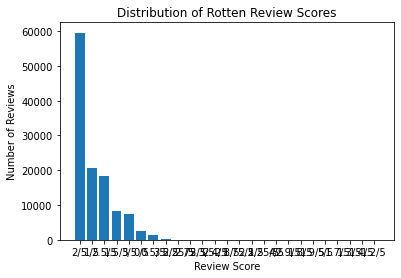

In [ ]:
# Focusing on Rotten Reviews, what is the distribution of the review scores?

rotten_reviews = reviews_df[reviews_df["review_type"] == "Rotten"]
rotten_reviews_score_counts = rotten_reviews["review_score"].value_counts().iloc[:25]
display(rotten_reviews_score_counts)

plt.bar(rotten_reviews_score_counts.index, rotten_reviews_score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Rotten Review Scores")
plt.show()

In [ ]:
# Even twenty-six reviews with a score of 4/5... weren't they supposed to be rotten???
# And it's not even the strangest thing.
# Now I'm curious, let's see the content of the review with a 4.7/5 score...

strange_review = rotten_reviews[rotten_reviews["review_score"] == "4.7/5"]
print("Strange review:")
display(strange_review)
print(strange_review.review_content.values[0])

Strange review:


review_type review_score  \
1040586      Rotten        4.7/5   

                                            review_content  
1040586  Thriller at best qualifies as an interesting a...

Thriller at best qualifies as an interesting attempt at bringing additional perspectives to horror. Given the potential of this particular niche of the horror genre, that also makes it quite the wasted opportunity.


Number of rotten reviews: 110813


2/5      59541
1/5      20675
2.5/5    18482
1.5/5     8211
0/5       2448
0.5/5     1456
Name: review_score, dtype: int64

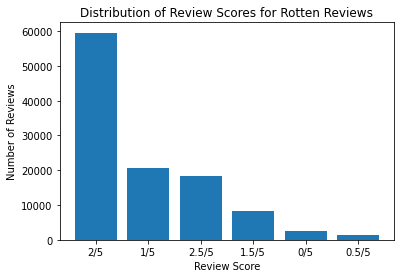

In [ ]:
# Unfortunately it's still obscure, at least to me, why this review would have a so high score...

# Anyway, it's maybe better, if we focus on the rotten reviews, to just consider those with 'rotten scores' as well.
# Maybe 0, 0.5, 1, 1.5, 2, 2.5 is a good threshold.
rotten_scores = ["0/5", "0.5/5", "1/5", "1.5/5", "2/5", "2.5/5"]
rotten_reviews = rotten_reviews[rotten_reviews["review_score"].isin(rotten_scores)]
rotten_reviews_score_counts = rotten_reviews["review_score"].value_counts()
print("Number of rotten reviews:", len(rotten_reviews))
display(rotten_reviews_score_counts)

plt.bar(rotten_reviews_score_counts.index, rotten_reviews_score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores for Rotten Reviews")
plt.show()

4/5       83633
3/5       82862
3.5/5     30787
5/5       24126
4.5/5     12381
2.5/5      2778
2/5         633
3.75/5      137
3.25/5       95
2.75/5       93
4.25/5       72
3.2/5        72
3.8/5        53
4.75/5       41
3.4/5        37
Name: review_score, dtype: int64

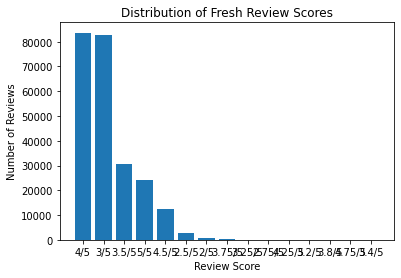

In [ ]:
# And now let's to the same for the fresh reviews.
fresh_reviews = reviews_df[reviews_df["review_type"] == "Fresh"]
fresh_reviews_score_counts = fresh_reviews["review_score"].value_counts().iloc[:15]
display(fresh_reviews_score_counts)

plt.bar(fresh_reviews_score_counts.index, fresh_reviews_score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Fresh Review Scores")
plt.show()

In [ ]:
# Again, out of curiosity... how does a fresh review with a 1/5 look like?
strange_review = fresh_reviews[fresh_reviews["review_score"] == "1/5"]
print("Strange review:")
print(strange_review.review_content.values[0])

Strange review:
Chipwrecked is the sort of Sunday afternoon trifle that will mollify children and mortify their parents.


Number of fresh reviews: 233789


4/5      83633
3/5      82862
3.5/5    30787
5/5      24126
4.5/5    12381
Name: review_score, dtype: int64

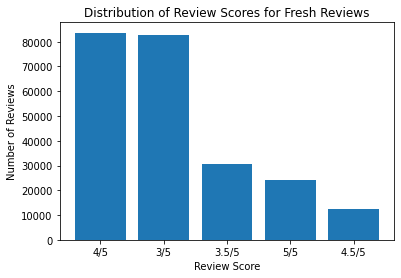

In [ ]:
# You call this a fresh review??
# Let's keep only the fresh reviews with a score of 3/5 or higher.
fresh_scores = ["3/5", "3.5/5", "4/5", "4.5/5", "5/5"]
fresh_reviews = fresh_reviews[fresh_reviews["review_score"].isin(fresh_scores)]
print("Number of fresh reviews:", len(fresh_reviews))
fresh_reviews_score_counts = fresh_reviews["review_score"].value_counts()
display(fresh_reviews_score_counts)

plt.bar(fresh_reviews_score_counts.index, fresh_reviews_score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores for Fresh Reviews")
plt.show()

Number of reviews: 344602


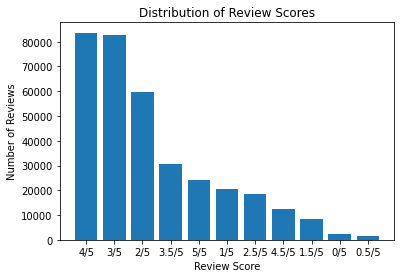

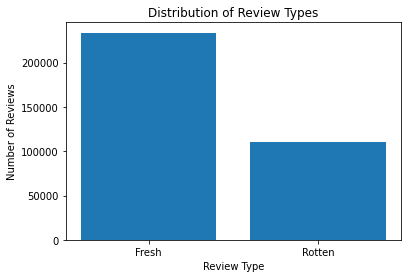

In [ ]:
# Let's stack the rotten and fresh reviews together.
reviews_df = pd.concat([rotten_reviews, fresh_reviews])
print("Number of reviews:", len(reviews_df))
# And let's count the number of reviews for each review score.
reviews_score_counts = reviews_df["review_score"].value_counts()
#display(reviews_score_counts)
review_type_counts = reviews_df["review_type"].value_counts()
#display(review_type_counts)

# Create a bar chart for review score counts
plt.bar(reviews_score_counts.index, reviews_score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores")

# Create a bar chart for review type counts
plt.figure()
plt.bar(review_type_counts.index, review_type_counts.values)
plt.xlabel("Review Type")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Types")

plt.show()

In [ ]:
# For how we subset the data we should have from  0/5 to 2.5/5 only rotten reviews and from 3/5 to 5/5 only fresh reviews.
# Let's check if this is true.
# First for the rotten reviews
check_rotten_reviews = reviews_df[
    reviews_df["review_score"].isin(["0/5", "0.5/5", "1/5", "1.5/5", "2/5", "2.5/5"])
]
true_rotten_reviews = reviews_df[reviews_df["review_type"] == "Rotten"]
print("Number of rotten scores:", len(check_rotten_reviews))
print("Number of rotten reviews:", len(true_rotten_reviews))
# And then for the fresh reviews
check_fresh_reviews = reviews_df[
    reviews_df["review_score"].isin(["3/5", "3.5/5", "4/5", "4.5/5", "5/5"])
]
true_fresh_reviews = reviews_df[reviews_df["review_type"] == "Fresh"]
print("Number of fresh scores:", len(check_fresh_reviews))
print("Number of fresh reviews:", len(true_fresh_reviews))

Number of rotten scores: 110813
Number of rotten reviews: 110813
Number of fresh scores: 233789
Number of fresh reviews: 233789


In [ ]:
# But we need to take care of the duplicates...
# Let's get rid of the reviews without an actual content and duplicates.

print("Number of reviews before dropping duplicates:", len(reviews_df))
nodup_reviews_df = reviews_df.dropna().drop_duplicates()
print("Number of reviews after dropping duplicates:", len(nodup_reviews_df))
# display(nodup_reviews_df)

Number of reviews before dropping duplicates: 344602
Number of reviews after dropping duplicates: 268469


In [ ]:
# Let's check again the distribution of the review scores.
nodup_reviews_score_counts = nodup_reviews_df["review_score"].value_counts()
display(nodup_reviews_score_counts)

4/5      65988
3/5      62349
2/5      44255
3.5/5    26397
5/5      18524
2.5/5    15633
1/5      15255
4.5/5    10522
1.5/5     6842
0/5       1530
0.5/5     1174
Name: review_score, dtype: int64

In [ ]:
# Overwrite
reviews_df = nodup_reviews_df

In [ ]:
# Let's check again the distribution of the review scores.
check_rotten_reviews = reviews_df[
    reviews_df["review_score"].isin(["0/5", "0.5/5", "1/5", "1.5/5", "2/5", "2.5/5"])
]
true_rotten_reviews = reviews_df[reviews_df["review_type"] == "Rotten"]
print("Number of rotten scores:", len(check_rotten_reviews))
print("Number of rotten reviews:", len(true_rotten_reviews))
# And then for the fresh reviews
check_fresh_reviews = reviews_df[
    reviews_df["review_score"].isin(["3/5", "3.5/5", "4/5", "4.5/5", "5/5"])
]
true_fresh_reviews = reviews_df[reviews_df["review_type"] == "Fresh"]
print("Number of fresh scores:", len(check_fresh_reviews))
print("Number of fresh reviews:", len(true_fresh_reviews))

Number of rotten scores: 84689
Number of rotten reviews: 84689
Number of fresh scores: 183780
Number of fresh reviews: 183780


In [ ]:
# Everything adds up :)
# So now, to have a balanced test, we can take some random samples equally
# from all the different scores, but careful... there are 6 scores for the rotten reviews and 5 for the fresh reviews.
# We'll take 1000 samples from each of the scores, but to balance things out we'll take 2000 samples from the score 3/5

clean_reviews_df = pd.DataFrame(columns=reviews_df.columns)
N_SAMPLES = 1000
for score in rotten_scores + fresh_scores:
    if score == "3/5":
        score_reviews = reviews_df[reviews_df["review_score"] == score].sample(
            2 * N_SAMPLES, random_state=2023
        )
    else:
        score_reviews = reviews_df[reviews_df["review_score"] == score].sample(
            N_SAMPLES, random_state=2023
        )
    clean_reviews_df = pd.concat([clean_reviews_df, score_reviews])

In [ ]:
# Let's check if we have the same number of reviews for each score.
clean_reviews_score_counts = clean_reviews_df["review_score"].value_counts()
display(clean_reviews_score_counts)
clean_review_type_counts = clean_reviews_df["review_type"].value_counts()
display(clean_review_type_counts)

3/5      2000
0/5      1000
0.5/5    1000
1/5      1000
1.5/5    1000
2/5      1000
2.5/5    1000
3.5/5    1000
4/5      1000
4.5/5    1000
5/5      1000
Name: review_score, dtype: int64

Rotten    6000
Fresh     6000
Name: review_type, dtype: int64

In [ ]:
print("Number of reviews before dropping duplicates:", len(clean_reviews_df))
nodup_clean_reviews_df = clean_reviews_df.dropna().drop_duplicates()
print("Number of reviews after dropping duplicates:", len(nodup_clean_reviews_df))

Number of reviews before dropping duplicates: 12000
Number of reviews after dropping duplicates: 12000


In [ ]:
# Very well, it means that when we dropped the duplicates before we actually did that well.
# But double check is always good :)

In [ ]:
# Overwrite
clean_reviews_df = nodup_clean_reviews_df

In [ ]:
# Let's get rid of the reviews without an actual content
print("Number of reviews before dropping insignificant reviews:", len(clean_reviews_df))
nonull_clean_reviews_df = clean_reviews_df[
    ~clean_reviews_df["review_content"].str.contains("click for full review")
]
print("Number of reviews after dropping insignificant reviews:", len(nonull_clean_reviews_df))
display(nonull_clean_reviews_df.sample(10, random_state=2023))

Number of reviews before dropping insignificant reviews: 12000
Number of reviews after dropping insignificant reviews: 12000


review_type review_score  \
1080705       Fresh          4/5   
1052186      Rotten          0/5   
500681       Rotten          2/5   
68453         Fresh          3/5   
208958        Fresh          3/5   
73752         Fresh        3.5/5   
935729        Fresh        4.5/5   
473690        Fresh          3/5   
692722        Fresh          4/5   
349439       Rotten          1/5   

                                            review_content  
1080705  The extraordinary improvisational performances...  
1052186  AT the centre of our galaxy is a supermassive ...  
500681   The argument for Cobain's brilliance never qui...  
68453    An old fashioned, professionally executed thri...  
208958   Those who like things sentimental and sweet - ...  
73752    It's a good movie, but definitely a few notche...  
935729   Though it has the potential for real greatness...  
473690                      As artful as it is appetizing.  
692722   Manages to integrate the [internet's] simultan...  
349439   There's plenty of singing and haircutting and ...

In [ ]:
# Again, the drop_duplicates() method already removed all those reviews with "click for full review"

In [ ]:
# By lucky chance, while creating this notebook,
# we could see that there are some reviews in other languages..
# better to get rid of them.


def detect_english_language(text):
    try:
        return langdetect.detect(text) == "en"
    except:
        return False

In [ ]:
len(clean_reviews_df)

12000

In [ ]:
# ATTENTION: It will take some time...
# Let's keep only the reviews in English.
en_clean_reviews = clean_reviews_df[
    clean_reviews_df["review_content"].apply(detect_english_language)
]
display(en_clean_reviews)

review_type review_score  \
79070        Rotten          0/5   
266306       Rotten          0/5   
1111952      Rotten          0/5   
999045       Rotten          0/5   
361790       Rotten          0/5   
...             ...          ...   
323917        Fresh          5/5   
54113         Fresh          5/5   
237627        Fresh          5/5   
468398        Fresh          5/5   
1098261       Fresh          5/5   

                                            review_content  
79070    Not a good time. Seriously, really not a good ...  
266306   One of the most painfully bad films I have eve...  
1111952                              A waste of celluloid.  
999045   Carrey gives the worst performance of his, or ...  
361790                    UFOs in Brooklyn? Fuggedaboutit!  
...                                                    ...  
323917   Don't phone home, phone the theater and buy ti...  
54113    A skin-crawling, gut-busting, Karo-syrup cover...  
237627   Its plump chickens maintain that strange, hapt...  
468398   This is a cinema of no escape, and few if any ...  
1098261  Mr. Reynor's portrayal of this man-child is an...  

[11738 rows x 3 columns]

In [ ]:
# Let's see some of the non-english reviews.
non_en_reviews = clean_reviews_df.drop(en_clean_reviews.index)
print("Number of non-english reviews:", len(non_en_reviews))
display(non_en_reviews.sample(30))

Number of non-english reviews: 262


review_type review_score  \
1041180      Rotten          2/5   
718068        Fresh          3/5   
57989         Fresh          4/5   
506646       Rotten        1.5/5   
54713        Rotten        2.5/5   
918192       Rotten          1/5   
1036012      Rotten          1/5   
53141         Fresh          4/5   
804010        Fresh          5/5   
1093580      Rotten        2.5/5   
459159       Rotten        0.5/5   
374719       Rotten        0.5/5   
620255        Fresh          3/5   
608063        Fresh          3/5   
734908        Fresh          3/5   
856964        Fresh          5/5   
25671         Fresh          5/5   
1020877      Rotten          1/5   
804555        Fresh          3/5   
642565        Fresh          5/5   
1016269       Fresh          3/5   
99521        Rotten          1/5   
561713       Rotten          1/5   
1041292      Rotten        0.5/5   
1128357       Fresh          5/5   
729916       Rotten          2/5   
298233       Rotten        1.5/5   
1105633      Rotten          2/5   
239358       Rotten          0/5   
1112299      Rotten          0/5   

                                            review_content  
1041180  Talent-swapping basketball tale is bland but O...  
718068                        engaging but a bit pointless  
57989    Crash a beau avoir du contenu il n'est jamais ...  
506646                a staid, interminable miscalculation  
54713    ...va dans toutes les directions sans choisir ...  
918192                           embarrasses a horror icon  
1036012  impressionante que 13 Fantasmas tenha sido mon...  
53141                                               unique  
804010   C'est simple: si vous avez aim Shrek, vous ado...  
1093580                   A colorful but superficial mess.  
459159                                               Yawn.  
374719                     This movie just makes no sense!  
620255                  Oblivion is a sci-fi axiom colada.  
608063                    ...disarming in spite of itself.  
734908   Ksanazestameno, alla akomi nostimo, to piato p...  
856964   como se David Lynch tivesse dirigido sua prpri...  
25671                                             Magical.  
1020877  De to ruim, torna-se divertido. Com o perdo do...  
804555   [Seus] valores de produ√ß√£o jamais deixam de im...  
642565              a savage and spectacular social satire  
1016269                     Uneven, but not uninteresting.  
99521                                            Repugnant  
561713                                            Payneful  
1041292                          A cinematic suicide note.  
1128357  Mais um esfor√ßo brilhante de um diretor que in...  
729916                          hackneyed Golden Age hokum  
298233                               An ambitious failure.  
1105633  Atravs de uma edio ligeira, procura nos conven...  
239358                                   Tedium incarnate.  
1112299                                     crap crap crap

In [ ]:
# Not what we expected, there are too many false positives.. but anyway...

In [ ]:
# How did the value counts change after removing the non-english reviews?
en_clean_reviews_score_counts = en_clean_reviews["review_score"].value_counts()
display(en_clean_reviews_score_counts)

3/5      1959
2.5/5     990
4.5/5     988
3.5/5     984
1.5/5     983
0.5/5     982
2/5       982
4/5       982
0/5       971
5/5       959
1/5       958
Name: review_score, dtype: int64

In [ ]:
# Let's re-sample again
clean_reviews_df = pd.DataFrame(columns=reviews_df.columns)
N_SAMPLES = 950
reviews_df = en_clean_reviews
for score in rotten_scores + fresh_scores:
    if score == "3/5":
        score_reviews = reviews_df[reviews_df["review_score"] == score].sample(
            2 * N_SAMPLES, random_state=2023
        )
    else:
        score_reviews = reviews_df[reviews_df["review_score"] == score].sample(
            N_SAMPLES, random_state=2023
        )
    clean_reviews_df = pd.concat([clean_reviews_df, score_reviews])

In [ ]:
display(clean_reviews_df.value_counts("review_score"))
display(clean_reviews_df.value_counts("review_type"))

review_score
3/5      1900
0.5/5     950
0/5       950
1.5/5     950
1/5       950
2.5/5     950
2/5       950
3.5/5     950
4.5/5     950
4/5       950
5/5       950
dtype: int64

review_type
Fresh     5700
Rotten    5700
dtype: int64

In [ ]:
# Let's do one last more adjustment before we start with the actual sentiment analysis.
# We'll map the string scores to actual numerical values.
# We'll map the review type to numerical values as well: 0 for rotten and 1 for fresh.


def map_score_to_number(score):
    if score == "0/5":
        return 0
    elif score == "0.5/5":
        return 0.5
    elif score == "1/5":
        return 1
    elif score == "1.5/5":
        return 1.5
    elif score == "2/5":
        return 2
    elif score == "2.5/5":
        return 2.5
    elif score == "3/5":
        return 3
    elif score == "3.5/5":
        return 3.5
    elif score == "4/5":
        return 4
    elif score == "4.5/5":
        return 4.5
    elif score == "5/5":
        return 5


def map_review_type_to_number(review_type):
    if review_type == "Rotten":
        return 0
    elif review_type == "Fresh":
        return 1

In [ ]:
clean_reviews_df = clean_reviews_df.assign(
    review_score=clean_reviews_df["review_score"].apply(map_score_to_number)
)

clean_reviews_df = clean_reviews_df.assign(
    review_type=clean_reviews_df["review_type"].apply(map_review_type_to_number)
)

display(clean_reviews_df.sample(20))

review_type  review_score  \
238635             1             3   
300897             0           1.5   
572676             1           4.5   
739527             0           0.5   
878813             0           1.5   
684768             1           4.5   
484530             0           1.5   
263836             1           3.5   
194966             1           4.5   
773624             1           3.5   
491884             1             3   
955545             1             3   
506291             0             0   
338081             0           0.5   
844035             1             4   
130909             1           4.5   
719346             1           3.5   
1065975            1             3   
364434             0             1   
969374             0             1   

                                            review_content  
238635   Though this version adds little to Chucky's my...  
300897                    As scattered as it is senseless.  
572676   This is a film that lives or dies on its artis...  
739527   ... the picture ranks among the year's most co...  
878813   Tatum and Dewan have no chemistry while dancin...  
684768   Stephen Frears' sublimely nimble evisceration ...  
484530   In spite of the title you will not want to Jus...  
263836   The fight choreography is on point and the sou...  
194966   A searing portrait of the disintegration of no...  
773624   ...an unlikely but successful hybrid: a police...  
491884   It's a much better hitman movie than an econom...  
955545   Over-the-top violence, sex in Japanese horror/...  
506291   The least watchable movie ever to star Tom Han...  
338081   Oh Warner Bros. R-rated comedies, you used to ...  
844035   I didn't jump out of my chair and pump my fist...  
130909   A horror classic. It's ten times better than i...  
719346   In the end, "Revenge of the Electric Car" is a...  
1065975  Vintage Seagal. Although that's not much of a ...  
364434   As ever, "fun size" translates to "no fun what...  
969374   I don't roll out the word "gratuitous" often, ...

In [ ]:
# Save to a csv file the results obtained so far.
# clean_reviews_df.to_csv("clean_reviews.csv", index=False)

In [ ]:
# ---------------------------------------------------------- #
# ------------------- Sentiment Analysis ------------------- #
# ---------------------------------------------------------- #

In [ ]:
reviews_df = clean_reviews_df

In [ ]:
# reviews_df = pd.read_csv("clean_reviews.csv")
display(reviews_df.sample(10))

review_type  review_score  \
156238             0           0.5   
621804             1           3.5   
451033             1             3   
82369              1           3.5   
229683             0           0.5   
240297             0             0   
811914             0           0.5   
965223             0             2   
282170             1             3   
1041311            0           0.5   

                                            review_content  
156238   There isn't a single note in this movie that r...  
621804   All things considered, the fact that Ocean's 1...  
451033   The result feels just as long as the original ...  
82369    Despite its flaws, Wonderland is stuffed with ...  
229683   The 3D conversion is awful. The special effect...  
240297   Let's be blunt. This is an evil film. It defam...  
811914   It's as painful to watch as Rodman's star-post...  
965223   There are one or two good jokes and the cast i...  
282170   Like its subject, the movie is not as calculat...  
1041311              Ugly, disturbing, and misguided mess.

In [ ]:
# ========================================
# ===== Preprocessing the text data ======
# ========================================


def preprocess_text(text):
    # Removing numerical data or irrelevant characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Removing stopwords
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Joining the tokens back to a string
    text = " ".join(tokens)
    return text

In [ ]:
# ATTENTION: It will take some time again
reviews_df["review_content"] = reviews_df["review_content"].apply(preprocess_text)
display(reviews_df.sample(10))

review_type  review_score  \
389002             0           0.5   
137080             1           3.5   
675427             0           2.5   
1000675            1           4.5   
295557             1             5   
940047             1           3.5   
832410             1           3.5   
571576             1             5   
1106545            1             4   
425012             0             0   

                                            review_content  
389002   like dead kitty left rot grandma couch movie s...  
137080   alex garland beautifully subverts cliche fanta...  
675427   someone involved production made horrible mist...  
1000675  smartly edited utterly engrossing intelligent ...  
295557    time always fly tarantino give u lot movie money  
940047   conjuring slow moment bit shorter two hour tec...  
832410   extremely visceral experience much say contemp...  
571576             still powerful story two loser new york  
1106545  widow slow start buffer screentime awesome finish  
425012               im still marvelling ive actually seen

In [ ]:
# Save to a file the preprocessed reviews.
# reviews_df.to_csv("preprocessed_reviews.csv", index=False)

In [ ]:
# ==========================================
# =========== Embedding the data ===========
# ==========================================

# We have two main choices for the embedding of the text data with Gensim:
# 1. Word2Vec
# 2. GloVe

# reviews_df = pd.read_csv("preprocessed_reviews.csv")

In [ ]:
reviews_df.isnull().sum()

review_type       0
review_score      0
review_content    0
dtype: int64

In [ ]:
dna_reviews_df = reviews_df.dropna()
print("Number of reviews after dropping NaNs:", len(dna_reviews_df))
dna_reviews_df.isnull().sum()

Number of reviews after dropping NaNs: 11400


review_type       0
review_score      0
review_content    0
dtype: int64

In [ ]:
# dna_reviews_df.to_csv("preprocessed_reviews.csv", index=False)

In [ ]:
# reviews_df = pd.read_csv("preprocessed_reviews.csv")

In [ ]:
reviews_df.describe()

review_type  review_score
count     1.14e+04      1.14e+04
mean           0.5         2.542
std            0.5          1.52
min              0             0
25%              0         1.375
50%            0.5          2.75
75%              1         3.625
max              1             5

In [ ]:
# REMINDER: as long as we work on the binary classification, this dataset
# is pretty balanced, but if we want to do a regression to estimate the
# score of a review, then we have to drop the 1000 reviews from the score 3/5
# that we have kept for balancing the reviews according to the type (fresh/rotten).

In [ ]:
# Let's start with Word2Vec.

text = " ".join(reviews_df["review_content"].tolist())
words = text.split()
model = Word2Vec([words], min_count=1)
model.save("word2vec.model")

In [ ]:
embeddings = []
vocabulary = []

for word in model.wv.index2word:
    embeddings.append(model.wv[word])
    vocabulary.append(word)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(embeddings)

sample_words = random.sample(vocabulary, 100)
sample_embeddings = [embeddings[vocabulary.index(word)] for word in sample_words]

In [ ]:
print("Vocabulary size: {}".format(len(vocabulary)))

Vocabulary size: 20892


In [ ]:
df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
df["word"] = vocabulary

# N_SAMPLES = 500
# df = df.sample(n=N_SAMPLES, replace=False, random_state=42)

sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(120, 120))
sns.scatterplot(data=df, x="PC1", y="PC2", legend=False)
for i, row in df.iterrows():
    plt.annotate(row["word"], (row["PC1"], row["PC2"]))
plt.show()

In [ ]:
plt.savefig("rotten_tomatoes-word2vec.png", dpi=300, bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

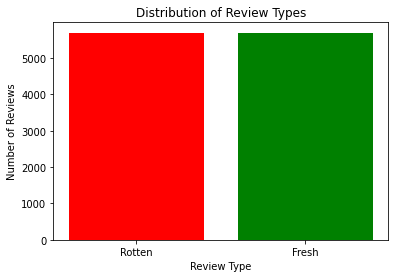

In [ ]:
# Final Dataset that is obtained after pre-processing 
# Get the count of reviews by review type
review_type_counts = reviews_df["review_type"].value_counts()

# Define the colors for the bar chart
colors = ["red", "green"]

# Plot the bar chart with different colors and labels
plt.bar(x=["Rotten", "Fresh"], height=review_type_counts.values, color=colors)
plt.xlabel("Review Type")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Types")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Another way to look at the words' distribution... the WordCloud.

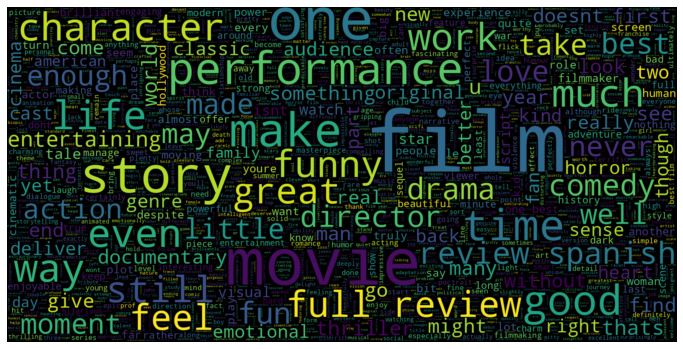

In [ ]:
# WordCloud for positive reviews:
positive_reviews = reviews_df[reviews_df["review_type"] == 1].review_content
positive_reviews_text = " ".join(positive_reviews)

wordcloud = WordCloud(
    max_words=2000, width=1600, height=800, max_font_size=200
).generate(positive_reviews_text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

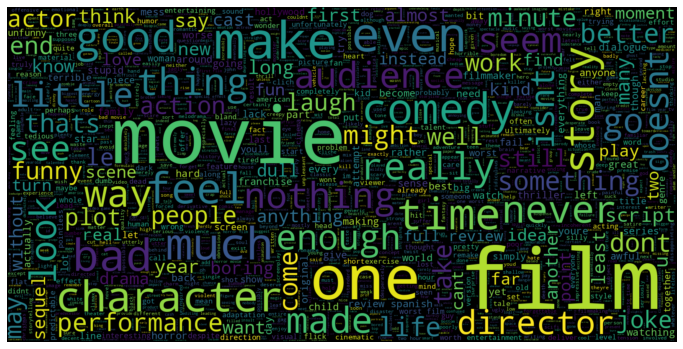

In [ ]:
# WordCloud for negative reviews:
negative_reviews = reviews_df[reviews_df["review_type"] == 0].review_content
negative_reviews_text = " ".join(negative_reviews)

wordcloud = WordCloud(
    max_words=2000, width=1600, height=800, max_font_size=200
).generate(negative_reviews_text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

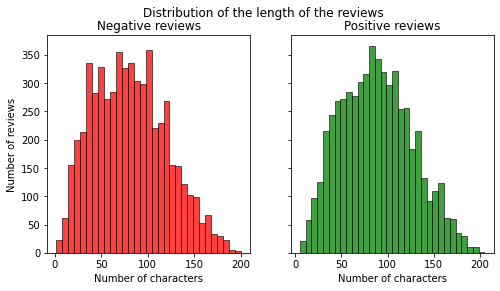

In [ ]:
# Let's have a look at the length of the reviews
#   (in terms of number of characters).
text_len_neg = negative_reviews.str.len()
text_len_pos = positive_reviews.str.len()

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sns.histplot(
    text_len_neg, ax=ax[0], color="red", label="Negative reviews", multiple="dodge"
)
sns.histplot(
    text_len_pos, ax=ax[1], color="green", label="Positive reviews", multiple="dodge"
)

ax[0].set_title("Negative reviews")
ax[0].set_xlabel("Number of characters")
ax[0].set_ylabel("Number of reviews")

ax[1].set_title("Positive reviews")
ax[1].set_xlabel("Number of characters")
ax[1].set_ylabel("Number of reviews")

fig.suptitle("Distribution of the length of the reviews")
plt.show()

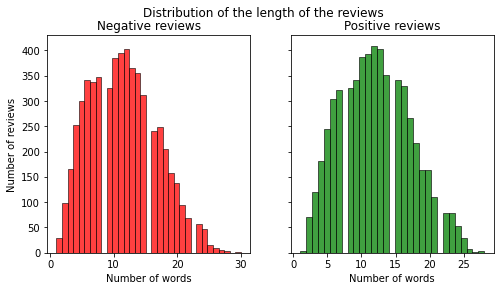

In [ ]:
#   (and now in terms of number of words)

text_wc_neg = negative_reviews.str.split().map(lambda x: len(x))
text_wc_pos = positive_reviews.str.split().map(lambda x: len(x))

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

sns.histplot(
    text_wc_neg, ax=ax[0], color="red", label="Negative reviews", multiple="dodge"
)
sns.histplot(
    text_wc_pos, ax=ax[1], color="green", label="Positive reviews", multiple="dodge"
)

ax[0].set_title("Negative reviews")
ax[0].set_xlabel("Number of words")
ax[0].set_ylabel("Number of reviews")

ax[1].set_title("Positive reviews")
ax[1].set_xlabel("Number of words")
ax[1].set_ylabel("Number of reviews")

fig.suptitle("Distribution of the length of the reviews")
plt.show()

##Applying the prepreocessed data to the model

In [ ]:
# ========================================= #
# ============ DISCLAIMER ================= #
# ========================================= #

# Big part of the code used for this sentiment analysis
# is taken from the code provided during the lectures of the course 
#            "DEEP LEARNING (2022)" 
# taken at 
# 
#             UNIVERSITA' DEGLI STUDI DI BRESCIA 
#             ( https://www.unibs.it/it )
# 
# taught by   PROF. IVAN SERINA
#             ( https://ivan-serina.unibs.it )

# In particular, 
#  - the code used to define the model on top of BERT
#  - the function preprocessing_for_bert(data, max_len)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 51.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.6/7.6 MB 95.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190.3/190.3 KB 20.7 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from transformers import BertModel, BertTokenizer
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler


import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
import gensim
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
ROOT = Path() # PUT HERE WHERE YOU DESIRE TO SAVE THE TRAINED MODELS

In [ ]:
RANDOM_STATE = 2023

TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2

In [ ]:
# Create a function to tokenize a set of texts
def preprocessing_for_bert(data, max_len):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text = sent,  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=max_len,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

TASKS:
- Classification (binary: [Rotten/Fresh])
- Regression: [0-5]

# CLASSIFICATION

In [ ]:
# reviews_df = pd.read_csv(ROOT / "preprocessed_reviews.csv")

# Sample just a portion of the data
# perc = 0.99
# reviews_df = reviews_df.sample(frac=perc, random_state=RANDOM_STATE)

X = reviews_df['review_content'].values
y = reviews_df['review_type'].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# For later use in manual testing phase
X_test_d = pd.DataFrame(X_test, columns=["review_content"])
y_test_d = pd.DataFrame(y_test, columns=["review_type"])

class_testing_phase_df = pd.concat([y_test_d, X_test_d], axis=1)

X_train, X_val, y_train, y_val =\
    train_test_split(X_train, y_train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

# Tokenize the input text

# From the histogram we saw that all the reviews
# are shorter than 30 tokens.
max_len = 30

# Run function `preprocessing_for_bert` on the train set, the validation set and the test set
train_inputs, train_masks = preprocessing_for_bert(X_train, max_len)
val_inputs, val_masks = preprocessing_for_bert(X_val, max_len)
test_inputs, test_masks = preprocessing_for_bert(X_test, max_len)

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
test_labels = torch.tensor(y_test)

# For fine-tuning BERT, it's recommended a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=1)

print('Head of the test set')
display(class_testing_phase_df.head())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Head of the test set


review_type                                     review_content
0            1     epic king arthur saga illicit affair brutality
1            1  summer big expensive superhero flick moonrise ...
2            1  film reminds u straightup romance far day genr...
3            0  porkieslite college comedy offer virtually not...
4            1         washington customarily magnetic davis film

In [ ]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
class BertForSentimentAnalysis(nn.Module):
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertForSentimentAnalysis, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        
        D_in, H, D_out = 768, 100, 2 #The hidden level can be changed to improve the performances!

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Dropout(0.1), #Try to change the dropout value to improve the performances
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        pooled_output = outputs.pooler_output
        # Extract the last hidden state of the token `[CLS]` for classification task
        # last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(pooled_output)

        return logits

In [ ]:
def train(model, train_dataloader, optimizer, criterion):
    model.train()
    total_loss, total_acc = 0, 0
    for step, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        optimizer.zero_grad()
        logits = model(input_ids, attention_mask=attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += accuracy_score(torch.argmax(logits, axis=1).cpu().numpy(), labels.cpu().numpy())
    return total_loss/len(train_dataloader), total_acc/len(train_dataloader)


def evaluate(model, val_dataloader, criterion):
    model.eval()
    total_loss, total_acc = 0, 0
    with torch.no_grad():
        for step, batch in enumerate(val_dataloader):
            input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
            logits = model(input_ids, attention_mask=attention_mask)
            loss = criterion(logits, labels)
            total_loss += loss.item()
            total_acc += accuracy_score(torch.argmax(logits, axis=1).cpu().numpy(), labels.cpu().numpy())
    return total_loss/len(val_dataloader), total_acc/len(val_dataloader)

In [ ]:
model = BertForSentimentAnalysis(freeze_bert=False)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# ATTENTION: RUN IT ONLY IF YOU HAVE SOME TIME AT DISPOSAL
train_losses = []
train_accs = []
val_losses = []
val_accs = []

num_epochs = 5
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_dataloader, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Epoch {epoch+1}/{num_epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}')


Epoch 1/5 - Training Loss: 0.5396 - Training Accuracy: 0.7287 - Validation Loss: 0.4299 - Validation Accuracy: 0.8134
Epoch 2/5 - Training Loss: 0.3678 - Training Accuracy: 0.8421 - Validation Loss: 0.4160 - Validation Accuracy: 0.8160
Epoch 3/5 - Training Loss: 0.2214 - Training Accuracy: 0.9178 - Validation Loss: 0.5107 - Validation Accuracy: 0.8079
Epoch 4/5 - Training Loss: 0.1318 - Training Accuracy: 0.9531 - Validation Loss: 0.6085 - Validation Accuracy: 0.8171
Epoch 5/5 - Training Loss: 0.0882 - Training Accuracy: 0.9723 - Validation Loss: 0.5881 - Validation Accuracy: 0.8144


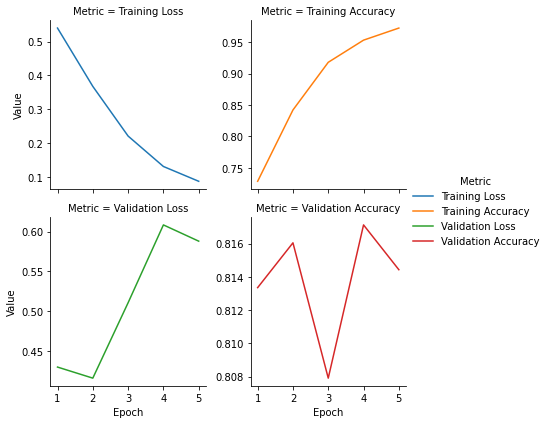

In [ ]:
data = {
    'Epoch': range(1, num_epochs+1),
    'Training Loss': train_losses,
    'Training Accuracy': train_accs,
    'Validation Loss': val_losses,
    'Validation Accuracy': val_accs
}

trends = pd.DataFrame(data)

trends = trends.melt(id_vars=['Epoch'], var_name='Metric', value_name='Value')

# Create a facet grid with subplots for each metric
g = sns.FacetGrid(trends, col='Metric', hue='Metric', col_wrap=2, sharey=False)
g.map(sns.lineplot, 'Epoch', 'Value')

# Set the axis labels and legend
g.set_axis_labels('Epoch', 'Value')
g.add_legend()

# Show the plot
plt.show()

In [ ]:
torch.save(model.state_dict(), ROOT / "unibs-binary-nofreeze-pooled.pth")

In [ ]:
bert_classification = BertForSentimentAnalysis()
bert_classification.load_state_dict(torch.load(ROOT / "unibs-binary-nofreeze-pooled.pth"))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [ ]:
bert_classification.to(device)

In [ ]:
def predict(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()
    predictions=[]
    # Tracking variables
    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()
        predictions.append(int(preds.detach().cpu().numpy()))

    return predictions

In [ ]:
predictions = predict(bert_classification, test_dataloader)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1155
           1       0.79      0.84      0.81      1161

    accuracy                           0.81      2316
   macro avg       0.81      0.81      0.81      2316
weighted avg       0.81      0.81      0.81      2316



# REGRESSION

In [ ]:
reviews_df = reviews_df.drop(columns=['review_type'])
# First we need to rescale the values from [0,5] to [0,1]
reviews_df['review_score'] = reviews_df['review_score'] / 5.0

In [ ]:
reviews_df.sample(10)

review_score                                     review_content
410555              1  filled dramatic tension complex character rich...
100609            0.9  soulstirring screen adaptation henrik ibsen br...
127316            0.6  formidable acting duo story need retelling the...
1030492             1  since grey garden film invited u strange barel...
235903            0.3  bunch meanspirited child totally control teari...
676439              1  moving documentary survivor lead u reflect upo...
748436            0.3  director seems buy author fond autoenshrinemen...
296743            0.6  chapiron never let thing get boring even cant ...
136139            0.1  expect dialogue stilted effect tacky scary thi...
486156            0.6  fun feelgood way spend couple hour actually in...

In [ ]:
# Sample just a portion of the data
# perc = 0.25
# reviews_df = reviews_df.sample(frac=perc, random_state=RANDOM_STATE)

X = reviews_df['review_content'].values
y = reviews_df['review_score'].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val =\
    train_test_split(X_train, y_train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

# For later use in manual testing phase
X_test_d = pd.DataFrame(X_test, columns=["review_content"])
y_test_d = pd.DataFrame(y_test, columns=["review_score"])

regress_testing_phase_df = pd.concat([y_test_d, X_test_d], axis=1)

# Tokenize the input text

max_len = 30

# Run function `preprocessing_for_bert` on the train set, the validation set and the test set
train_inputs, train_masks = preprocessing_for_bert(X_train, max_len)
val_inputs, val_masks = preprocessing_for_bert(X_val, max_len)
test_inputs, test_masks = preprocessing_for_bert(X_test, max_len)

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
test_labels = torch.tensor(y_test)

# For fine-tuning BERT, it's recommended a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=1)

print('Head of the test set')
display(regress_testing_phase_df.head())

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Head of the test set


review_score                                     review_content
0           0.6     epic king arthur saga illicit affair brutality
1             1  summer big expensive superhero flick moonrise ...
2           0.6  film reminds u straightup romance far day genr...
3           0.2  porkieslite college comedy offer virtually not...
4           0.6         washington customarily magnetic davis film

In [ ]:
class BertForSentimentRegression(nn.Module):
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertForSentimentRegression, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        
        D_in, H, D_out = 768, 100, 1 #The hidden level can be changed to improve the performances!

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.regressor = nn.Sequential(
            nn.Dropout(0.1), #Try to change the dropout value to improve the performances
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

        self.double()

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        pooled_output = outputs.pooler_output
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        # last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        regression_output = self.regressor(pooled_output)

        return regression_output.squeeze(-1)

In [ ]:
def train(model, train_dataloader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    for i, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        # input_ids = batch['input_ids'].to(device)
        # attention_mask = batch['attention_mask'].to(device)
        # labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(train_dataloader)


def evaluate(model, val_dataloader, criterion, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(val_dataloader):
            input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs, labels)

            epoch_loss += loss.item()

    return epoch_loss / len(val_dataloader)


In [ ]:
model = BertForSentimentRegression(freeze_bert=False)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.MSELoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train_losses = []
val_losses = []

num_epochs = 5

for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, optimizer, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(train_loss)
    val_loss = evaluate(model, val_dataloader, criterion, device)
    print(f"Epoch {epoch+1}. Train loss: {train_loss:.5f}. Validation loss: {val_loss:.5f}")


Epoch 1. Train loss: 0.08438. Validation loss: 0.05635
Epoch 2. Train loss: 0.04752. Validation loss: 0.05511
Epoch 3. Train loss: 0.03253. Validation loss: 0.05918
Epoch 4. Train loss: 0.02208. Validation loss: 0.05604
Epoch 5. Train loss: 0.01628. Validation loss: 0.05332


In [ ]:
torch.save(model.state_dict(), ROOT / "unibs-regression-nofreeze-pooled.pth")

In [ ]:
bert_regression = BertForSentimentRegression()
bert_regression.load_state_dict(torch.load(ROOT / "unibs-regression-nofreeze-pooled.pth"))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [ ]:
bert_regression.to(device)

In [ ]:
def predict(model, test_dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, _ = tuple(t.to(device) for t in batch)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions.extend(outputs.tolist())

    return predictions

In [ ]:
predictions = predict(model, test_dataloader)
targets = y_test

mse = mean_squared_error(targets, predictions)
rmse = mean_squared_error(targets, predictions, squared=False)
mae = mean_absolute_error(targets, predictions)
r2 = r2_score(targets, predictions)

print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2: {r2:.5f}")

MSE: 0.05843
RMSE: 0.24173
MAE: 0.18152
R2: 0.42351


In [ ]:
# ============================================== #
# =============== Manual Testing =============== #
# ============================================== #

In [ ]:
bert_classification = BertForSentimentAnalysis()
bert_classification.load_state_dict(torch.load(ROOT / "unibs-binary-nofreeze-pooled.pth"))

bert_regression = BertForSentimentRegression()
bert_regression.load_state_dict(torch.load(ROOT / "unibs-regression-nofreeze-pooled.pth"))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.trans

<All keys matched successfully>

In [ ]:
def preprocess_text(text):
    # Removing numerical data or irrelevant characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Removing stopwords
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Joining the tokens back to a string
    text = " ".join(tokens)
    return text

In [ ]:
def custom_classification_test(model, text):
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(inputs['input_ids'], inputs['attention_mask'])
    predicted_class = torch.argmax(outputs[0])
    return 'Fresh' if predicted_class == 1 else 'Rotten'

In [ ]:
def custom_regression_test(model, text, mult):
    input = tokenizer(text, return_tensors='pt')
    output = model(input['input_ids'], input['attention_mask'])
    return output.item() * float(mult)

In [ ]:
reviews = pd.read_csv(ROOT / "clean_reviews.csv")
reviews = reviews.sample(50, random_state=RANDOM_STATE+1)

for r in reviews.iterrows():
    _, r = r
    review_type, review_score, review_content = r
    # print(r)eview_type, review_score, review_content = r
    print('REVIEW:')
    print(review_content)

    text = preprocess_text(review_content)

    print('True type:', 'Rotten' if review_type == 0 else 'Fresh')
    print('Predicted type:', custom_classification_test(bert_classification, text))

    print('True score:', review_score)
    print('Predicted score:', custom_regression_test(bert_regression, text, 5))

REVIEW:
Aimless, sloppy, low-budget garbage that will prove especially painful to endure for long-time Kevin Smith fans. Where did all that zeitgeist savvy go?
True type: Rotten
Predicted type: Rotten
True score: 0.5
Predicted score: 0.7563454390599058
REVIEW:
[Washington] has a terrific cast at his disposal.
True type: Fresh
Predicted type: Fresh
True score: 3.0
Predicted score: 3.2764272219320056
REVIEW:
My Cousin Rachel belongs to Weisz, in a role that capitalises on her gift for showing multiple layers of emotion.
True type: Fresh
Predicted type: Fresh
True score: 3.0
Predicted score: 3.2818575735365316
REVIEW:
Some of the phallic jokes work, others are really lame. Fortunately there are many other funny bits that have nothing to do with body parts that keep the laughs coming.
True type: Fresh
Predicted type: Fresh
True score: 3.0
Predicted score: 1.36877654277474
REVIEW:
I think it was after Betty White told Steve Martin's son not to "wear his hair like a ***" that I thought about

In [ ]:
# TESTING ON THE TEST SETS
# CLASSIFICATION TASK
reviews = class_testing_phase_df
reviews = reviews.sample(20, random_state=RANDOM_STATE+1)
for r in reviews.iterrows():
    _, r = r
    review_type, review_content = r
    print('REVIEW:')
    print(review_content)

    text = preprocess_text(review_content)

    print('True type:', 'Rotten' if review_type == 0 else 'Fresh')
    print('Predicted type:', custom_classification_test(bert_classification, text))

print('============================')

reviews = regress_testing_phase_df
reviews = reviews.sample(20, random_state=RANDOM_STATE+1)
for r in reviews.iterrows():
    _, r = r
    review_score, review_content = r
    print('REVIEW:')
    print(review_content)

    text = preprocess_text(review_content)

    print('True score:', review_score)
    print('Predicted score:', custom_regression_test(bert_regression, text, 1))



REVIEW:
plenty diverting stylistic perspective story behind flair positively stoneage
True type: Rotten
Predicted type: Fresh
REVIEW:
earnest amateurish tween fairy tale set south sea
True type: Rotten
Predicted type: Rotten
REVIEW:
funny fit start wearing welcome short order
True type: Rotten
Predicted type: Rotten
REVIEW:
mindless dumb fun arnie grunt one liner try terminate escaped drug lord who fast car heading freedom
True type: Rotten
Predicted type: Rotten
REVIEW:
quirky nihilistic
True type: Fresh
Predicted type: Fresh
REVIEW:
death wish nra member wet dream perfect film america exists poisoned imagination pathetic wouldbe bully white house
True type: Rotten
Predicted type: Rotten
REVIEW:
movie cant decide want wellobserved urban relationship drama madcap comedy
True type: Rotten
Predicted type: Rotten
REVIEW:
paul walter hauser reason see film witnessing hauser emergence riveting actor dominates every scene he force sheer unadulterated talent
True type: Rotten
Predicted type: 

In [ ]:
# TESTING ON REVIEWS THAT WERE RATED FROM 0 to 4
# (recall, the training was performed only on reviews
#  rated from 0 to 5)

reviews_df = pd.read_csv(ROOT / "reviews_0-4-RF.csv")
reviews = reviews_df.sample(50, random_state=RANDOM_STATE+1)

for r in reviews.iterrows():
    _, r = r
    _, review_type, review_score, review_content = r
    print('REVIEW:')
    print(review_content)

    text = preprocess_text(review_content)

    print('True type:', 'Rotten' if review_type == 0 else 'Fresh')
    print('Predicted type:', custom_classification_test(bert_classification, text))

    print('True score:', review_score)
    print('Predicted score:', custom_regression_test(bert_regression, text, 5))

REVIEW:
Pan's Labyrinth, like del Toro's previous and related The Devil's Backbone, is a saturated vision, an artist's work. What it lacks is successful unity.
True type: Fresh
Predicted type: Rotten
True score: 2.5/4
Predicted score: 2.1881861324143665
REVIEW:
We Own the Night is defiantly, refreshingly unhip.
True type: Fresh
Predicted type: Rotten
True score: 3/4
Predicted score: 3.144210071896332
REVIEW:
Last week's Tomcats is a comedic masterpiece next to Joe Dirt.
True type: Fresh
Predicted type: Fresh
True score: 1.5/4
Predicted score: 4.323968509702439
REVIEW:
You'd be hard pressed too many other documentaries that leave you feeling so damn great.
True type: Fresh
Predicted type: Fresh
True score: 3.5/4
Predicted score: 4.6242599121596655
REVIEW:
These characters are extremes but Reitman employs them in this microcosm to dramatic (and sometimes darkly comedic) purposes.
True type: Fresh
Predicted type: Fresh
True score: 3/4
Predicted score: 3.306212862284637
REVIEW:
Terrence Ma

# Second Approach (Testing on the whole dataset based on review_type only)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1sV-Ngbf3WmIbYGIvQbZGGG5_IkMKu6FL&confirm=T" -O "rotten_tomatoes_reviews.csv"

--2023-03-06 20:18:36--  https://docs.google.com/uc?export=download&id=1sV-Ngbf3WmIbYGIvQbZGGG5_IkMKu6FL&confirm=T
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.113, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vr6nu3q17udnq4gu78rgqpf6ikk78g61/1678133850000/06647553919662690540/*/1sV-Ngbf3WmIbYGIvQbZGGG5_IkMKu6FL?e=download&uuid=540dd673-8683-4ef6-bfff-6d33a043fabb [following]
--2023-03-06 20:18:36--  https://doc-00-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vr6nu3q17udnq4gu78rgqpf6ikk78g61/1678133850000/06647553919662690540/*/1sV-Ngbf3WmIbYGIvQbZGGG5_IkMKu6FL?e=download&uuid=540dd673-8683-4ef6-bfff-6d33a043fabb
Resolving doc-00-6k-docs.googleusercontent.com (doc-00-6k-docs.googleusercontent.com)... 142.251.107.

In [ ]:
df = pd.read_csv("rotten_tomatoes_reviews.csv")

In [ ]:
df.head()

rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thief i...

In [ ]:
df.shape

(1130017, 8)

### Feature Selection

#### Removing unecessary columns (revealing personal info, dates, and links)

In [ ]:
print(df.columns)

df.drop(inplace = True, columns=['rotten_tomatoes_link', 'critic_name', 'publisher_name','review_date'])

df.head()

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')


top_critic review_type review_score  \
0       False       Fresh          NaN   
1       False       Fresh          NaN   
2       False       Fresh          NaN   
3       False       Fresh        3.5/5   
4        True      Rotten          NaN   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thief i...

### Dealing with null values

In [ ]:
df.isnull().sum()

top_critic             0
review_type            0
review_score      305936
review_content     65806
dtype: int64

In our case, the input will be the review_content and the target is the review_type (rotten or fresh) -> so we can remove review_score

In [ ]:
df.drop(inplace = True, columns=['review_score'])
df.dropna(inplace=True)
df.shape

(1064211, 3)

In [ ]:
df.isnull().sum()

top_critic        0
review_type       0
review_content    0
dtype: int64

### Data distribution

(array([681035.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 383176.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

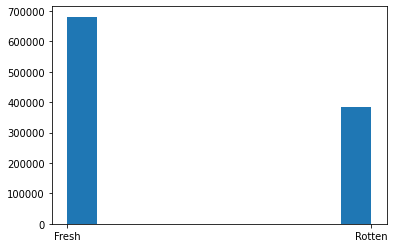

In [ ]:
plt.hist(df['review_type'])

## Cleaning text

In [ ]:
# combining all reviews into one text
all_reviews = " ".join(df["review_content"])

In [ ]:
# printing part of all_reviews
all_reviews[:3000]

'A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment. Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it\'s an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of? What\'s really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again. It\'s more a list of ingredients than a movie-magic potion to enjoy from start to finish. Harry Potter knockoffs don\'t come more transparent and slapdash than this wannabe-franchise

### Checking the vocabulary

In [ ]:
chars = sorted(list(set(all_reviews))) 
vocab_size = len(chars) 
print(''.join(chars)) 
print(vocab_size)

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~¬Ä¬Ö¬ë¬í¬ì¬î¬ñ¬ó¬ô¬†¬©¬∑√Ä√Å√Ç√É√Ö√à√â√ä√ç√ì√î√ï√ñ√ò√ö√ú√û√ü√†√°√¢√£√§√•√¶√ß√®√©√™√´√¨√≠√Æ√Ø√∞√±√≤√≥√¥√µ√∂√∏√π√∫√ª√º√ΩƒÅƒÉƒáƒç≈Ç≈Ñ≈ç≈ô≈õ≈û≈ü≈´≈ª»è»ô»õÃÅÃÉÃáÃàÃäŒëŒüŒ¨Œ≠ŒÆŒØŒ±Œ≤Œ≥Œ¥ŒµŒ∑Œ∏ŒπŒ∫ŒªŒºŒΩŒøœÄœÅœÇœÉœÑœÖœÜœáœâœåœé”ì·¥±·¥µ·¥∏·µÄ‚ÄÉ‚Äà‚Äâ‚Ää‚Äã‚Äç‚Äé‚Äê‚Äë‚Äí‚Äì‚Äî‚Äï‚Äò‚Äô‚Äú‚Äù‚Ä¶‚Ä®‚Ä©‚Ä™‚Ä¨‚Ä≤‚Ä≥‚Å†‚ÇÇ‚Ñ¢‚àí‚àô‚â§‚â•‚îÄ‚óè‚òÖ‚ô•„ÉÑÔ¨ÅÔªøüí∞
249


In [ ]:
def cleaning_text(text):
  text = text.lower() 
  text = re.sub(' üò§ ', "", text) 
  text = re.sub('\[.*?\]', '', text) 
  text = re.sub('https?://\S+|www\.\S+', '', text) 
  text = re.sub('<.*?>+', '', text) 
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
  text = re.sub('[‚Äò‚Äô‚Äú‚Äù‚Ä¶]', '', text) 
  return text 
cleaning = lambda x: cleaning_text(x)

In [ ]:
df_new = df.copy()
df_new['clean_reviews'] = df_new['review_content'].apply(cleaning)
df_new.head()

top_critic review_type                                     review_content  \
0       False       Fresh  A fantasy adventure that fuses Greek mythology...   
1       False       Fresh  Uma Thurman as Medusa, the gorgon with a coiff...   
2       False       Fresh  With a top-notch cast and dazzling special eff...   
3       False       Fresh  Whether audiences will get behind The Lightnin...   
4        True      Rotten  What's really lacking in The Lightning Thief i...   

                                       clean_reviews  
0  a fantasy adventure that fuses greek mythology...  
1  uma thurman as medusa the gorgon with a coiffu...  
2  with a topnotch cast and dazzling special effe...  
3  whether audiences will get behind the lightnin...  
4  whats really lacking in the lightning thief is...

In [ ]:
all_clean_reviews = " ".join(df_new['clean_reviews'])
chars = sorted(list(set(all_clean_reviews))) 
vocab_size = len(chars) 
print(''.join(chars)) 
print(vocab_size)

 0123456789abcdefghijklmnopqrstuvwxyz¬Ä¬Ö¬ë¬í¬ì¬î¬ñ¬ó¬ô¬†¬©¬∑√ü√†√°√¢√£√§√•√¶√ß√®√©√™√´√¨√≠√Æ√Ø√∞√±√≤√≥√¥√µ√∂√∏√π√∫√ª√º√Ω√æƒÅƒÉƒáƒç≈Ç≈Ñ≈ç≈ô≈õ≈ü≈´≈º»ô»õÃÅÃÉÃáÃàÃäŒ¨Œ≠ŒÆŒØŒ±Œ≤Œ≥Œ¥ŒµŒ∑Œ∏ŒπŒ∫ŒªŒºŒΩŒøœÄœÅœÇœÉœÑœÖœÜœáœâœåœé”ì·¥±·¥µ·¥∏·µÄ‚ÄÉ‚Äà‚Äâ‚Ää‚Äã‚Äç‚Äé‚Äê‚Äë‚Äí‚Äì‚Äî‚Äï‚Ä®‚Ä©‚Ä™‚Ä¨‚Ä≤‚Ä≥‚Å†‚ÇÇ‚Ñ¢‚àí‚àô‚â§‚â•‚îÄ‚óè‚òÖ‚ô•„ÉÑÔ¨ÅÔªøüí∞
166


In [ ]:
df_new[df_new['clean_reviews'] == '']

top_critic review_type  \
60688         False      Rotten   
91667         False       Fresh   
125894        False       Fresh   
136533        False      Rotten   
158117        False       Fresh   
207302        False       Fresh   
211549        False      Rotten   
212058        False      Rotten   
222343        False       Fresh   
241057        False       Fresh   
251339        False      Rotten   
256511        False       Fresh   
268697        False       Fresh   
288771        False      Rotten   
308353        False      Rotten   
328716        False       Fresh   
332604         True       Fresh   
333264        False       Fresh   
352142        False      Rotten   
418510        False       Fresh   
424805        False       Fresh   
433448        False       Fresh   
484396        False       Fresh   
492968        False       Fresh   
500247        False       Fresh   
508180        False      Rotten   
517741        False       Fresh   
559381        False       Fresh   
560657        False       Fresh   
564464        False      Rotten   
565089        False       Fresh   
575648        False      Rotten   
616438        False       Fresh   
634634        False       Fresh   
651179        False      Rotten   
654450        False      Rotten   
697800        False       Fresh   
697801        False       Fresh   
712531         True      Rotten   
712590         True      Rotten   
730367        False       Fresh   
730418        False       Fresh   
747740        False      Rotten   
747741        False      Rotten   
874114         True      Rotten   
874127         True      Rotten   
906648        False       Fresh   
907346        False       Fresh   
963209        False       Fresh   
974730        False       Fresh   
981550         True       Fresh   
1067772       False      Rotten   
1068053       False      Rotten   
1085615       False       Fresh   
1118976       False       Fresh   
1126127       False      Rotten   
1127317       False       Fresh   

                                            review_content clean_reviews  
60688                                                    .                
91667                                                    .                
125894   http://cinefantastiqueonline.com/2008/09/16/fi...                
136533                                                   .                
158117                                                   .                
207302                              [Full Review in Greek]                
211549                                                   .                
212058                                                   .                
222343   http://www.spiritualityandpractice.com/films/r...                
241057                                                   .                
251339   https://birthmoviesdeath.com/2018/07/16/fantas...                
256511                                                   .                
268697                                                   .                
288771                                                   .                
308353                                                   .                
328716                                                   .                
332604   http://online.wsj.com/article/SB10001424052970...                
333264                                                   .                
352142   http://www.totalfilm.com/cinema_reviews/films_...                
418510                                                   .                
424805                                                   .                
433448                                                   .                
484396                                                   .                
492968                                                   .                
500247   http://www.tomatazos.com/noticias/143782/Nueva...                
508180                      

In [ ]:
df_new = df_new[df_new['clean_reviews'] != '']
df_new.shape

(1064154, 4)

In [ ]:
# checking the stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df_new['clean_reviews'] = df_new['clean_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_new

top_critic review_type  \
0             False       Fresh   
1             False       Fresh   
2             False       Fresh   
3             False       Fresh   
4              True      Rotten   
...             ...         ...   
1130008       False       Fresh   
1130013       False       Fresh   
1130014       False       Fresh   
1130015       False      Rotten   
1130016       False      Rotten   

                                            review_content  \
0        A fantasy adventure that fuses Greek mythology...   
1        Uma Thurman as Medusa, the gorgon with a coiff...   
2        With a top-notch cast and dazzling special eff...   
3        Whether audiences will get behind The Lightnin...   
4        What's really lacking in The Lightning Thief i...   
...                                                    ...   
1130008  A rousing reconstruction of the 1879 Battle of...   
1130013  Seen today, it's not only a startling indictme...   
1130014  A rousing visual spectacle that's a prequel of...   
1130015  A simple two-act story: Prelude to war, and th...   
1130016  Rides the line between being a pure artifact o...   

                                             clean_reviews  
0        fantasy adventure fuses greek mythology contem...  
1        uma thurman medusa gorgon coiffure writhing sn...  
2        topnotch cast dazzling special effects tide te...  
3        whether audiences get behind lightning thief h...  
4        whats really lacking lightning thief genuine s...  
...                                                    ...  
1130008    rousing reconstruction 1879 battle rorkes drift  
1130013  seen today startling indictment british imperi...  
1130014  rousing visual spectacle thats prequel cy endf...  
1130015  simple twoact story prelude war war former con...  
1130016  rides line pure artifact bygone eraone depicts...  

[1064154 rows x 4 columns]

In [ ]:
# removing punctuation
df_new['clean_reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    fantasy adventure fuses greek mythology contem...
1    ma human medulla gordon coiffure writhing snak...
2    topnotch cast dazzling special effects tide te...
3    whether audiences get behind lightning thief h...
4    what really lacking lightning thief genuine se...
5    list ingredient moviemagic portion enjoy start...
6    harry porter knockoffs dont come transparent s...
7    percy jackson isn great movie good one trottin...
8                                fun brisk imaginative
9    crammed dragoons setdestroying fights things e...
Name: clean_reviews, dtype: object

In [ ]:
df_new

top_critic review_type  \
0             False       Fresh   
1             False       Fresh   
2             False       Fresh   
3             False       Fresh   
4              True      Rotten   
...             ...         ...   
1130008       False       Fresh   
1130013       False       Fresh   
1130014       False       Fresh   
1130015       False      Rotten   
1130016       False      Rotten   

                                            review_content  \
0        A fantasy adventure that fuses Greek mythology...   
1        Uma Thurman as Medusa, the gorgon with a coiff...   
2        With a top-notch cast and dazzling special eff...   
3        Whether audiences will get behind The Lightnin...   
4        What's really lacking in The Lightning Thief i...   
...                                                    ...   
1130008  A rousing reconstruction of the 1879 Battle of...   
1130013  Seen today, it's not only a startling indictme...   
1130014  A rousing visual spectacle that's a prequel of...   
1130015  A simple two-act story: Prelude to war, and th...   
1130016  Rides the line between being a pure artifact o...   

                                             clean_reviews  
0        fantasy adventure fuses greek mythology contem...  
1        uma thurman medusa gorgon coiffure writhing sn...  
2        topnotch cast dazzling special effects tide te...  
3        whether audiences get behind lightning thief h...  
4        whats really lacking lightning thief genuine s...  
...                                                    ...  
1130008    rousing reconstruction 1879 battle rorkes drift  
1130013  seen today startling indictment british imperi...  
1130014  rousing visual spectacle thats prequel cy endf...  
1130015  simple twoact story prelude war war former con...  
1130016  rides line pure artifact bygone eraone depicts...  

[1064154 rows x 4 columns]

In [ ]:
df_new.drop_duplicates(inplace = True)
df_new.shape

(949669, 4)

## Sentiment Analysis

In [ ]:
def fetch_sentiment_using_textblob(text):
  analysis = TextBlob(text)
  return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [ ]:
fetch_sentiment_using_textblob = df_new['clean_reviews'].apply(lambda x: fetch_sentiment_using_textblob(x))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

clean_reviews
positive         715350
negative         234319

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df_new['clean_reviews'][4])

{'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'compound': -0.5667}

In [ ]:
df_new['review_type'][4]

'Rotten'

In [ ]:
df_score = pd.DataFrame()
df_score['clean_reviews'] = df_new['clean_reviews']
df_score['scores'] = df_score['clean_reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound'] = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0 else 'Negative')

In [ ]:
df_score['true_label'] = df_new['review_type']
df_score

clean_reviews  \
0        fantasy adventure fuses greek mythology contem...   
1        uma thurman medusa gorgon coiffure writhing sn...   
2        topnotch cast dazzling special effects tide te...   
3        whether audiences get behind lightning thief h...   
4        whats really lacking lightning thief genuine s...   
...                                                    ...   
1130008    rousing reconstruction 1879 battle rorkes drift   
1130013  seen today startling indictment british imperi...   
1130014  rousing visual spectacle thats prequel cy endf...   
1130015  simple twoact story prelude war war former con...   
1130016  rides line pure artifact bygone eraone depicts...   

                                                    scores  compound  \
0        {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...    0.7579   
1        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...         0   
2        {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...    0.4019   
3        {'neg': 0.167, 'neu': 0.523, 'pos': 0.31, 'com...    0.6249   
4        {'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'comp...   -0.5667   
...                                                    ...       ...   
1130008  {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...   -0.3818   
1130013  {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...    0.0772   
1130014  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...         0   
1130015  {'neg': 0.324, 'neu': 0.561, 'pos': 0.115, 'co...   -0.8271   
1130016  {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...    0.2263   

        sentiment true_label  
0        Positive      Fresh  
1        Positive      Fresh  
2        Positive      Fresh  
3        Positive      Fresh  
4        Negative     Rotten  
...           ...        ...  
1130008  Negative      Fresh  
1130013  Positive      Fresh  
1130014  Positive      Fresh  
1130015  Negative     Rotten  
1130016  Positive     Rotten  

[949669 rows x 5 columns]

(array([694855.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 254814.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

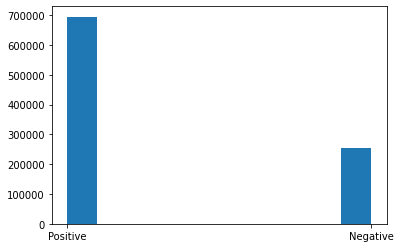

In [ ]:
plt.hist(df_score['sentiment'])

In [ ]:
from wordcloud import WordCloud

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(all_words)     
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show

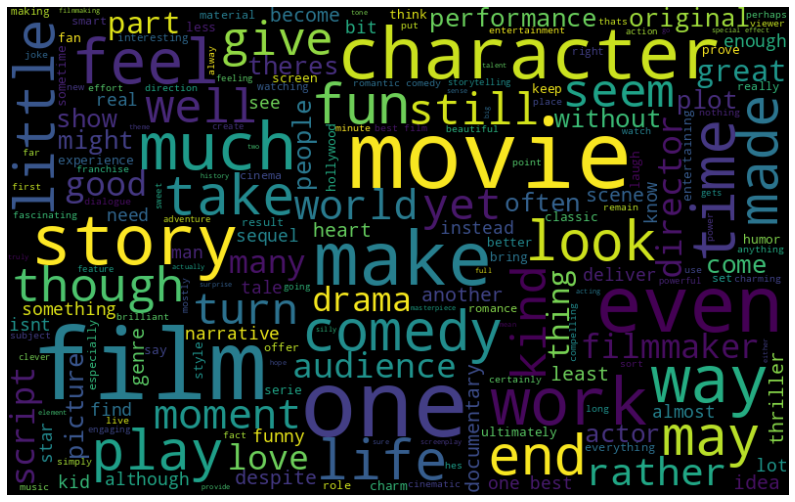

In [ ]:
all_words = ' '.join([text for text in df_score['clean_reviews'][df_score.sentiment == 'Positive']])
generate_wordcloud(all_words)

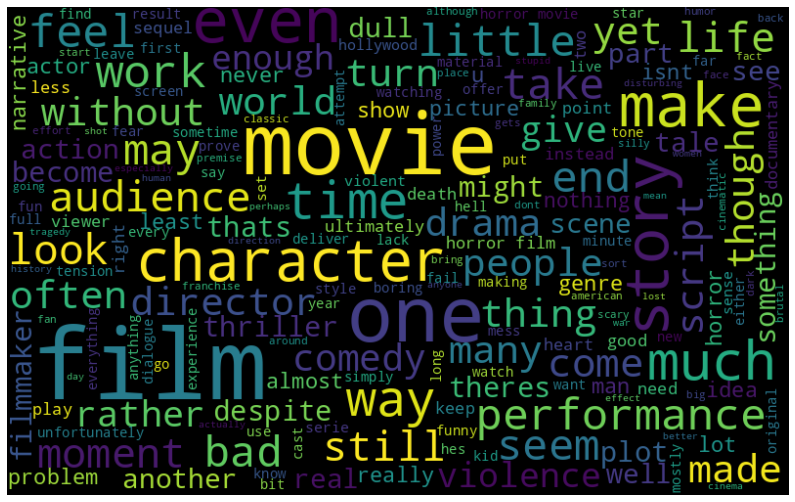

In [ ]:
all_words = ' '.join([text for text in df_score['clean_reviews'][df_score.sentiment == 'Negative']])
generate_wordcloud(all_words)

### Distribution of review sentiment based on top critics (for more reliable results)

In [ ]:
df_score['top_critic'] = df_new['top_critic']
df_score

clean_reviews  \
0        fantasy adventure fuses greek mythology contem...   
1        uma thurman medusa gorgon coiffure writhing sn...   
2        topnotch cast dazzling special effects tide te...   
3        whether audiences get behind lightning thief h...   
4        whats really lacking lightning thief genuine s...   
...                                                    ...   
1130008    rousing reconstruction 1879 battle rorkes drift   
1130013  seen today startling indictment british imperi...   
1130014  rousing visual spectacle thats prequel cy endf...   
1130015  simple twoact story prelude war war former con...   
1130016  rides line pure artifact bygone eraone depicts...   

                                                    scores  compound  \
0        {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...    0.7579   
1        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...         0   
2        {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...    0.4019   
3        {'neg': 0.167, 'neu': 0.523, 'pos': 0.31, 'com...    0.6249   
4        {'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'comp...   -0.5667   
...                                                    ...       ...   
1130008  {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...   -0.3818   
1130013  {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...    0.0772   
1130014  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...         0   
1130015  {'neg': 0.324, 'neu': 0.561, 'pos': 0.115, 'co...   -0.8271   
1130016  {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...    0.2263   

        sentiment true_label  top_critic  
0        Positive      Fresh       False  
1        Positive      Fresh       False  
2        Positive      Fresh       False  
3        Positive      Fresh       False  
4        Negative     Rotten        True  
...           ...        ...         ...  
1130008  Negative      Fresh       False  
1130013  Positive      Fresh       False  
1130014  Positive      Fresh       False  
1130015  Negative     Rotten       False  
1130016  Positive     Rotten       False  

[949669 rows x 6 columns]

(array([ 68889.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 182065.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

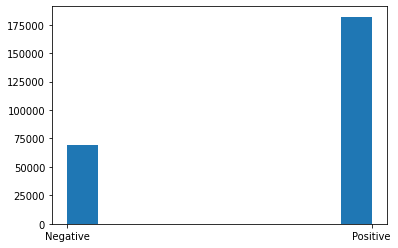

In [ ]:
plt.hist(df_score[df_score['top_critic']==True]['sentiment'])

(array([512790.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 185925.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

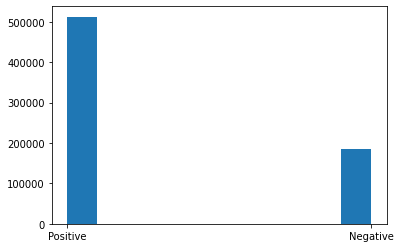

In [ ]:
plt.hist(df_score[df_score['top_critic']==False]['sentiment'])

In [ ]:
encoded_labels = {"sentiment":     {"Positive": 1, "Negative": 0},
                "true_label": {"Fresh": 1, "Rotten": 0}}
df_score = df_score.replace(encoded_labels)
df_score.head()

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_score['sentiment'].values, df_score['true_label'].values)
print("The accuracy is:", accuracy)

The accuracy is: 0.6476667133495987


##Evaluation

**Strategy 1**: Following this path we created two balanced datasets to tackle two different problems:
- prediction of the type of the review (classification).
- prediction of the score of the review (regression).

Both the tasks were approached working on top of a pretrained BERT model,
stacking some layers upon it:
- in the case of classification, the last layer is a linear layer with two neurons as output, that is, the two probabilities that the review is either 
- in the case of regression, the last layer is a linear layer with one neuron as output (the actual predicted score, a number between 0 and 1 that will
be rescaled accordingly),
- in both cases a dropout layer was added just after the pre-trained BERT model output, and an additional linear hidden layer was added.

Accuracy: Classification + Bert = 81 %

*It might be interesting to see how the Bert model would perform on the entire dataset, or even on a larger segment of the data.*



**Strategy 2**: In this approach, we used a simple method (SentimentIntensityAnalyzer) to analyze the sentiment behind the review. The SentimentIntensityAnalyzer gives the results in a format of multiple scores: negative, neutral, positive, and compound. After getting the scores of all the reviews, we labeled the prediction with positive and egative based on the compound score (a score lower than 0 is negative and a score greater or equal to 0 is positive). 
Next, to be able to visualize what the algorithm did, we plotted the word cloud of the positive and negative vocabulary.
We also calculated the accuracy score by comparing the predicted sentiment with the true label (positive = fresh, and negative = rotten) 
Lastly, to be able to implement such approach in a real-life scenario we seperately showed the reviews of the top critics and normal critics. This approach can be used to accurately and reliably rate movies based on reviews from true top critics

Accuracy: Classification + Sentiment Analysis = 64.7%

#Conclusion:
##What Worked:



*   Balancing the training data
*   Selection of Important features from the dataset
* Using Bert model did improve the performnace of the model.
*   The approach with considering only the review type showed better results than the other.

##Limitations:



*   Preprocessing might have led to overfitting the model
*   Could not test the first approach on a bigger dataset or the entire dataset




##What could have been done better



*   feature engineering to improve the accuracy of sentiment classification. For example, features like word count, sentence length, and punctuation count could be used.


*  providing pre-defined lists of words and phrases that are associated with positive and negative sentiment in the context of movie reviews to improve sentiment classification accuracy













